In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C://Users//IMI-KOLKATA//Downloads//Test_Dataset.xlsx")

In [3]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender
0,CUS1,25,5,Urban,Female
1,CUS2,30,10,Urban,Male
2,CUS3,25,8,Rural,Female
3,CUS4,35,15,Rural,Female
4,CUS5,45,20,Urban,Male
5,CUS6,20,5,Urban,Male
6,CUS7,50,20,Urban,Male
7,CUS8,40,10,Urban,Female


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Gender_Enc'] = df['Gender'].map({'Male':0, 'Female':1}).astype(int)

In [5]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,Gender_Enc
0,CUS1,25,5,Urban,Female,1
1,CUS2,30,10,Urban,Male,0
2,CUS3,25,8,Rural,Female,1
3,CUS4,35,15,Rural,Female,1
4,CUS5,45,20,Urban,Male,0
5,CUS6,20,5,Urban,Male,0
6,CUS7,50,20,Urban,Male,0
7,CUS8,40,10,Urban,Female,1


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Demography_Enc'] = df['Demography'].map({'Rural':0, 'Urban':1}).astype(int)

In [7]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,Gender_Enc,Demography_Enc
0,CUS1,25,5,Urban,Female,1,1
1,CUS2,30,10,Urban,Male,0,1
2,CUS3,25,8,Rural,Female,1,0
3,CUS4,35,15,Rural,Female,1,0
4,CUS5,45,20,Urban,Male,0,1
5,CUS6,20,5,Urban,Male,0,1
6,CUS7,50,20,Urban,Male,0,1
7,CUS8,40,10,Urban,Female,1,1


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df['Age']=sc.fit_transform(df[['Age']])
df['Income (INR) (in lakhs per annum)']=sc.fit_transform(df[['Income (INR) (in lakhs per annum)']])

In [14]:
df

,CustomerID,Age,Income (INR) (in lakhs per annum),Demography,Gender,Gender_Enc,Demography_Enc
0,CUS1,-0.881917,-1.166880,Urban,Female,1,1
1,CUS2,-0.377964,-0.286216,Urban,Male,0,1
2,CUS3,-0.881917,-0.638482,Rural,Female,1,0
3,CUS4,0.125988,0.594448,Rural,Female,1,0
4,CUS5,1.133893,1.475113,Urban,Male,0,1
5,CUS6,-1.385870,-1.166880,Urban,Male,0,1
6,CUS7,1.637846,1.475113,Urban,Male,0,1
7,CUS8,0.629941,-0.286216,Urban,Female,1,1


In [22]:
dataWithoutLabels = df.drop(["CustomerID","Demography","Gender"], axis = 1)
dataWithoutLabels


,Age,Income (INR) (in lakhs per annum),Gender_Enc,Demography_Enc
0,-0.881917,-1.166880,1,1
1,-0.377964,-0.286216,0,1
2,-0.881917,-0.638482,1,0
3,0.125988,0.594448,1,0
4,1.133893,1.475113,0,1
5,-1.385870,-1.166880,0,1
6,1.637846,1.475113,0,1
7,0.629941,-0.286216,1,1


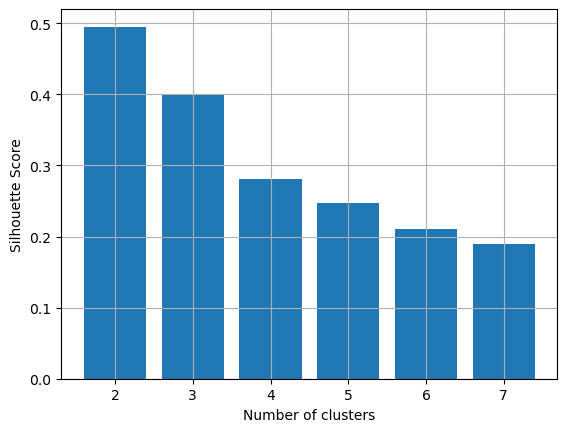

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,8):
    silhouette_scores.append( 
        silhouette_score(dataWithoutLabels, KMeans(n_clusters = n_cluster).fit_predict(dataWithoutLabels))) 
    

k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


In [32]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)

In [33]:
clusters

array([1, 0, 0, 1, 1, 1, 1, 0])

In [34]:
dataWithoutLabels["Cluster"] = clusters

In [35]:
dataWithoutLabels

,Age,Income (INR) (in lakhs per annum),Gender_Enc,Demography_Enc,Cluster
0,-0.881917,-1.166880,1,1,1
1,-0.377964,-0.286216,0,1,0
2,-0.881917,-0.638482,1,0,0
3,0.125988,0.594448,1,0,1
4,1.133893,1.475113,0,1,1
5,-1.385870,-1.166880,0,1,1
6,1.637846,1.475113,0,1,1
7,0.629941,-0.286216,1,1,0


About Dataset

This dataset captures information about customers, featuring key attributes such as CustomerID, Age, Income (in lakhs per annum), Demography, and Gender. The age range spans from 20 to 50 years, while the income varies between 5 to 20 lakhs per annum. The demography includes both urban and rural settings, with a diverse representation of genders. The dataset provides a snapshot of a range of customers, offering insights into their demographic profiles for potential analysis and decision-making in various domains, such as marketing or finance.

2nd Steps
In the second step of our analysis, we encoded the categorical variables, Gender and Demography, for further application of the K-means clustering algorithm. Assigning numerical values such as 0 for male, 1 for female, 0 for rural, and 1 for urban facilitates the clustering process, enabling the algorithm to discern patterns and relationships within the dataset based on these features. 

step 3
Following the encoding process, we proceeded to enhance the clustering model by dropping non-contributory labels such as CustomerID, Gender, and Demography. This refined dataset, consisting solely of the encoded labels – age, income, and the encoded gender and demography – is now optimized for K-means clustering.

Step 4
To ensure uniform scales across variables and enhance the K-means algorithm's performance, we applied standardization to the dataset. Standardizing the values brings all features to a common scale, preventing certain variables from dominating the clustering process based on their magnitude. This step is crucial for achieving more balanced and accurate cluster assignments, as it mitigates the impact of differences in the original measurement units of age and income.

interpretation 
he silhouette scores represent the quality of clustering for different numbers of clusters in the K-means algorithm. A higher silhouette score indicates better-defined clusters. Looking at the values:

For 2 clusters, the silhouette score is highest, suggesting a reasonable separation of data points.
As the number of clusters increases, the score is decreases slightly, indicating a moderate decline in cluster cohesion.
With 4 clusters, the silhouette score further decreases, and subsequent increases in the number of clusters continue to show diminishing silhouette scores.
This silhouette score interpretation implies that a division into two clusters might be the most suitable choice, as it yields the highest silhouette score, signifying well-defined and distinct clusters in the data.


Customers in Cluster 0 (with 'Cluster' values of 0) and Cluster 1 (with 'Cluster' values of 1) exhibit different characteristics based on the features considered during clustering, which include Age, Income, Gender_Enc (encoded gender), and Demography_Enc (encoded demography). This clustering enables the segmentation of customers into two groups, allowing for targeted analysis and decision-making tailored to the specific traits exhibited by each cluster.where cus1,cus4,cus5,cus6 is in cluster 1and others are in 2nd cluster.






























